In [14]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

# Send an HTTP GET request to retrieve the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table with class "wikitable"
table = soup.find("table", {"class": "wikitable"})

# Initialize empty lists to store data
country_names = []
UN_CONTINENTAL_REGIONs = []
UN_STATISTICAL_SUBREGIONs = []
POPULATIONs_1_JULY_2022 = []
POPULATIONs_1_JULY_2023 = []

# Iterate through table rows, skipping the header row (th elements)
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    if len(columns) >= 5:
        country_name = columns[0].text.strip()
        UN_CONTINENTAL_REGION = columns[1].text.strip()
        UN_STATISTICAL_SUBREGION = columns[2].text.strip()
        POPULATION_1_JULY_2022 = columns[3].text.strip()
        POPULATION_1_JULY_2023 = columns[4].text.strip()

        country_names.append(country_name)
        UN_CONTINENTAL_REGIONs.append(UN_CONTINENTAL_REGION)
        UN_STATISTICAL_SUBREGIONs.append(UN_STATISTICAL_SUBREGION)
        POPULATIONs_1_JULY_2022.append(POPULATION_1_JULY_2022)
        POPULATIONs_1_JULY_2023.append(POPULATION_1_JULY_2023)

# Print the scraped data
for i in range(len(country_names)):
    print(f"Country: {country_names[i]}, Continental Region: {UN_CONTINENTAL_REGIONs[i]}, Subcontinental Region: {UN_STATISTICAL_SUBREGIONs[i]}, Population in 2022:
    {POPULATIONs_1_JULY_2022[i]}, Population in 2023: {POPULATIONs_1_JULY_2023[i]}")



Country: India, Continental Region: Asia, Subcontinental Region: Southern Asia, Population in 2022: 1,417,173,173, Population in 2023: 1,428,627,663
Country: China[a], Continental Region: Asia, Subcontinental Region: Eastern Asia, Population in 2022: 1,425,887,337, Population in 2023: 1,425,671,352
Country: United States[b], Continental Region: North America, Subcontinental Region: Northern America, Population in 2022: 338,289,857, Population in 2023: 339,996,564
Country: Indonesia, Continental Region: Asia, Subcontinental Region: Southeastern Asia, Population in 2022: 275,501,339, Population in 2023: 277,534,123
Country: Pakistan, Continental Region: Asia, Subcontinental Region: Southern Asia, Population in 2022: 235,824,863, Population in 2023: 240,485,658
Country: Nigeria, Continental Region: Africa, Subcontinental Region: Western Africa, Population in 2022: 218,541,212, Population in 2023: 223,804,632
Country: Brazil, Continental Region: South America, Subcontinental Region: Southe

In [16]:




data = pd.DataFrame({
    "Country": country_names,
    "Continental Region": UN_CONTINENTAL_REGIONs,
    "Subcontinental Region": UN_STATISTICAL_SUBREGIONs,
    "Population in 2022": POPULATIONs_1_JULY_2022,
    "Population in 2023": POPULATIONs_1_JULY_2023
})

# Display the data as a table
print(data)


                                       Country Continental Region  \
0                                        India               Asia   
1                                     China[a]               Asia   
2                             United States[b]      North America   
3                                    Indonesia               Asia   
4                                     Pakistan               Asia   
5                                      Nigeria             Africa   
6                                       Brazil      South America   
7                                   Bangladesh               Asia   
8                                       Russia             Europe   
9                                       Mexico      North America   
10                                    Ethiopia             Africa   
11                                       Japan               Asia   
12                                 Philippines               Asia   
13                                

In [32]:

# Calculate growth rate and create a Pandas DataFrame
growth_rate = [(p2 - p1) / p1 * 100 for p1, p2 in zip(POPULATIONs_1_JULY_2022, POPULATIONs_1_JULY_2023)]

data = pd.DataFrame({
    "Country": country_names,
    "Continental Region": UN_CONTINENTAL_REGIONs,
    "Subcontinental Region": UN_STATISTICAL_SUBREGIONs,
    "Population in 2022": POPULATIONs_1_JULY_2022,
    "Population in 2023": POPULATIONs_1_JULY_2023,
    "Growth Rate (%)": growth_rate  # New column for growth rate
})

# Display the data as a table
print(data)



                               Country Continental Region  \
0                                India               Asia   
1                             China[a]               Asia   
2                     United States[b]      North America   
3                            Indonesia               Asia   
4                             Pakistan               Asia   
..                                 ...                ...   
231   Saint Helena (United Kingdom)[y]             Africa   
232        Montserrat (United Kingdom)           Americas   
233  Falkland Islands (United Kingdom)           Americas   
234                               Niue            Oceania   
235              Tokelau (New Zealand)            Oceania   

    Subcontinental Region  Population in 2022  Population in 2023  \
0           Southern Asia          1417173173          1428627663   
1            Eastern Asia          1425887337          1425671352   
2        Northern America           338289857           3399

In [2]:
# Separate countries into positive and negative growth rates
positive_growth = data[data["Growth Rate (%)"] > 0]
negative_growth = data[data["Growth Rate (%)"] < 0]

# Display the separated dataframes
print("Countries with Positive Growth Rate:")
print(positive_growth)

print("\nCountries with Negative Growth Rate:")
print(negative_growth)


Countries with Positive Growth Rate:
                               Country Continental Region  \
0                                India               Asia   
2                     United States[b]      North America   
3                            Indonesia               Asia   
4                             Pakistan               Asia   
5                              Nigeria             Africa   
..                                 ...                ...   
228                             Tuvalu            Oceania   
229          Saint Barthélemy (France)           Americas   
233  Falkland Islands (United Kingdom)           Americas   
234                               Niue            Oceania   
235              Tokelau (New Zealand)            Oceania   

    Subcontinental Region  Population in 2022  Population in 2023  \
0           Southern Asia          1417173173          1428627663   
2        Northern America           338289857           339996564   
3       Southeastern As

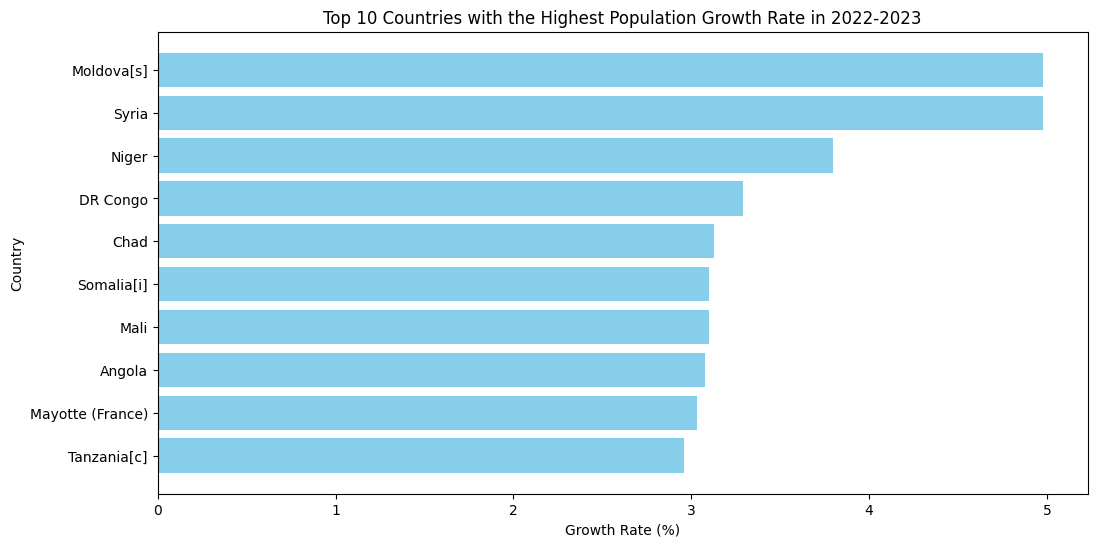

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib here


# Initialize empty lists to store data
country_names = []
growth_rates = []

# Iterate through table rows, skipping the header row (th elements)
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    if len(columns) >= 5:
        country_name = columns[0].text.strip()
        # Replace non-standard minus sign with a regular hyphen, then convert to float
        growth_rate_str = columns[5].text.strip().replace("−", "-").replace("%", "")
        growth_rate = float(growth_rate_str)

        country_names.append(country_name)
        growth_rates.append(growth_rate)

# Create a Pandas DataFrame
data = pd.DataFrame({
    "Country": country_names,
    "Growth Rate (%)": growth_rates
})

# Sort the data by growth rate
data = data.sort_values(by="Growth Rate (%)", ascending=False)

# Create a bar chart to illustrate population growth trends
plt.figure(figsize=(12, 6))
plt.barh(data["Country"][:10], data["Growth Rate (%)"][:10], color='skyblue')
plt.xlabel("Growth Rate (%)")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest Population Growth Rate in 2022-2023")
plt.gca().invert_yaxis()  # Invert y-axis to display the highest growth at the top
plt.show()

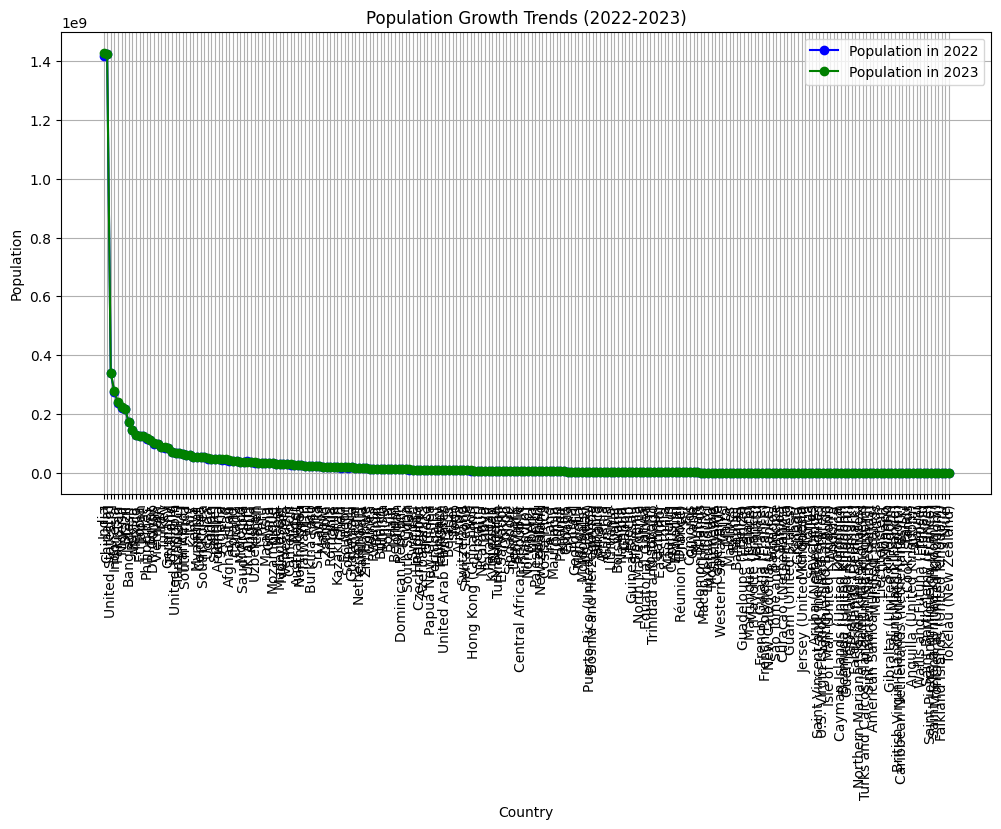

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

# Send an HTTP GET request to retrieve the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table with class "wikitable"
table = soup.find("table", {"class": "wikitable"})

# Initialize empty lists to store data
countries = []
population_2022 = []
population_2023 = []

# Iterate through table rows, skipping the header row (th elements)
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    if len(columns) >= 6:
        country_name = columns[0].text.strip()
        # Remove commas from population numbers and convert to integers
        pop_2022 = int(columns[3].text.strip().replace(",", ""))
        pop_2023 = int(columns[4].text.strip().replace(",", ""))

        countries.append(country_name)
        population_2022.append(pop_2022)
        population_2023.append(pop_2023)

# Create a Pandas DataFrame
data = pd.DataFrame({
    "Country": countries,
    "Population in 2022": population_2022,
    "Population in 2023": population_2023
})

# Create a line graph to illustrate population growth trends
plt.figure(figsize=(12, 6))
plt.plot(data["Country"], data["Population in 2022"], marker='o', label="Population in 2022", linestyle='-', color='b')
plt.plot(data["Country"], data["Population in 2023"], marker='o', label="Population in 2023", linestyle='-', color='g')
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population Growth Trends (2022-2023)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()







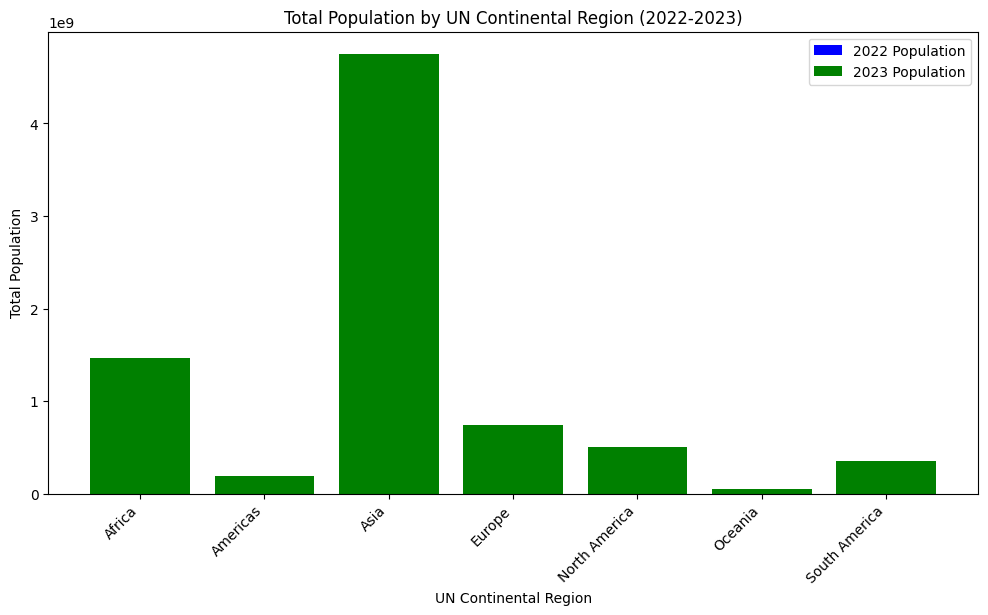

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

# Send an HTTP GET request to retrieve the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table with class "wikitable"
table = soup.find("table", {"class": "wikitable"})

# Initialize empty lists to store data
countries = []
populations_2022 = []
populations_2023 = []
continental_regions = []
statistical_subregions = []

# Iterate through table rows, skipping the header row (th elements)
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    if len(columns) >= 6:
        country_name = columns[0].text.strip()
        pop_2022 = int(columns[3].text.strip().replace(",", ""))
        pop_2023 = int(columns[4].text.strip().replace(",", ""))
        continental_region = columns[1].text.strip()
        statistical_subregion = columns[2].text.strip()

        countries.append(country_name)
        populations_2022.append(pop_2022)
        populations_2023.append(pop_2023)
        continental_regions.append(continental_region)
        statistical_subregions.append(statistical_subregion)

# Create a Pandas DataFrame
data = pd.DataFrame({
    "Country": countries,
    "Population in 2022": populations_2022,
    "Population in 2023": populations_2023,
    "UN Continental Region": continental_regions,
    "UN Statistical Subregion": statistical_subregions
})

# Group the data by UN Continental Region and calculate total population and average growth rate
region_summary = data.groupby("UN Continental Region").agg({
    "Population in 2022": "sum",
    "Population in 2023": "sum",
    "Country": "count"  # Number of countries in each region
}).reset_index()

# Create a bar chart to visualize the total population in each region
plt.figure(figsize=(12, 6))
plt.bar(region_summary["UN Continental Region"], region_summary["Population in 2022"], color='b', label="2022 Population")
plt.bar(region_summary["UN Continental Region"], region_summary["Population in 2023"], color='g', label="2023 Population")
plt.xlabel("UN Continental Region")
plt.ylabel("Total Population")
plt.title("Total Population by UN Continental Region (2022-2023)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()





In [33]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

# Send an HTTP GET request to retrieve the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table with class "wikitable"
table = soup.find("table", {"class": "wikitable"})

# Initialize empty lists to store data
countries = []
populations_2022 = []
populations_2023 = []

# Iterate through table rows, skipping the header row (th elements)
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    if len(columns) >= 6:
        country_name = columns[0].text.strip()
        pop_2022 = int(columns[3].text.strip().replace(",", ""))
        pop_2023 = int(columns[4].text.strip().replace(",", ""))

        countries.append(country_name)
        populations_2022.append(pop_2022)
        populations_2023.append(pop_2023)

# Create a Pandas DataFrame
data = pd.DataFrame({
    "Country": countries,
    "Population in 2022": populations_2022,
    "Population in 2023": populations_2023
})

# Calculate the percentage change in population
data["Percentage Change"] = ((data["Population in 2023"] - data["Population in 2022"]) / data["Population in 2022"]) * 100

# Define the threshold for significant change (e.g., ±5%)
threshold = 3


# Filter countries with significant changes
significant_changes = data[(data["Percentage Change"] > threshold) | (data["Percentage Change"] < -threshold)]

# Display the countries with significant changes
print("Countries with Significant Population Changes:")
print(significant_changes[["Country", "Percentage Change"]])


Countries with Significant Population Changes:
              Country  Percentage Change
14           DR Congo           3.285113
40         Ukraine[f]          -7.448301
41             Angola           3.077401
53              Niger           3.796043
57               Mali           3.098702
59              Syria           4.979673
66               Chad           3.132896
68         Somalia[i]           3.101961
93            Hungary          -3.644996
133        Moldova[s]           4.978161
181  Mayotte (France)           3.034029


In [19]:
import statistics
# Calculate basic statistics for population data
mean_2022 = data["Population in 2022"].mean()
mean_2023 = data["Population in 2023"].mean()

median_2022 = data["Population in 2022"].median()
median_2023 = data["Population in 2023"].median()

variance_2022 = data["Population in 2022"].var()
variance_2023 = data["Population in 2023"].var()

std_dev_2022 = data["Population in 2022"].std()
std_dev_2023 = data["Population in 2023"].std()

print("Descriptive Statistics for 2022:")
print(f"Mean: {mean_2022}")
print(f"Median: {median_2022}")
print(f"Variance: {variance_2022}")
print(f"Standard Deviation: {std_dev_2022}")

print("\nDescriptive Statistics for 2023:")
print(f"Mean: {mean_2023}")
print(f"Median: {median_2023}")
print(f"Variance: {variance_2023}")
print(f"Standard Deviation: {std_dev_2023}")


Descriptive Statistics for 2022:
Mean: 33792804.800847456
Median: 5515243.0
Variance: 1.855518671851745e+16
Standard Deviation: 136217424.4306412

Descriptive Statistics for 2023:
Mean: 34090312.48728813
Median: 5509917.5
Variance: 1.872387600572225e+16
Standard Deviation: 136835214.78669974


In [20]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare populations in 2022 and 2023
t_stat, p_value = ttest_rel(data["Population in 2022"], data["Population in 2023"])

print("Hypothesis Testing:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between populations in 2022 and 2023.")
else:
    print("There is no significant difference between populations in 2022 and 2023.")


Hypothesis Testing:
T-statistic: -4.57994780331404
P-value: 7.545928183065618e-06
There is a significant difference between populations in 2022 and 2023.


In [21]:
# Calculate the correlation between population in 2022 and 2023
correlation_coefficient = data["Population in 2022"].corr(data["Population in 2023"])

print("Correlation Analysis:")
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Analysis:
Correlation Coefficient: 0.9999835249015268


Linear Regression Coefficients:
Slope (Coefficient): 1.0045187756631953
Intercept: 144805.5825155005


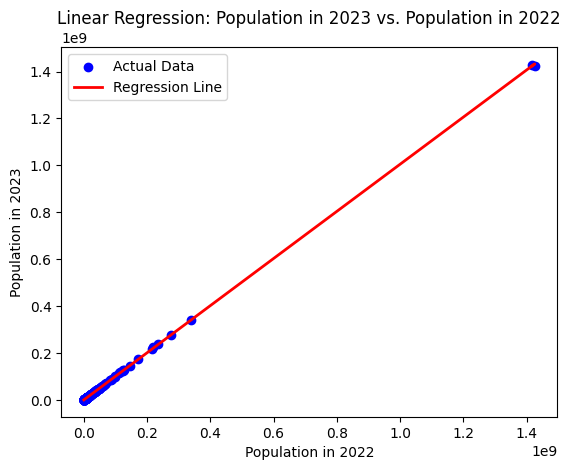

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have the data loaded in a Pandas DataFrame called 'data'

# Extract the independent variable (population in 2022) and dependent variable (population in 2023)
X = data["Population in 2022"].values.reshape(-1, 1)
y = data["Population in 2023"].values

# Create a linear regression model
regression_model = LinearRegression()

# Fit the model to your data
regression_model.fit(X, y)

# Predict population in 2023 based on population in 2022
population_2023_predicted = regression_model.predict(X)

# Calculate the coefficients (slope and intercept)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Print the coefficients
print("Linear Regression Coefficients:")
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

# Plot the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, population_2023_predicted, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Population in 2022')
plt.ylabel('Population in 2023')
plt.title('Linear Regression: Population in 2023 vs. Population in 2022')
plt.legend()
plt.show()


In [30]:
!pip install pystan==2.19.1.1
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
 

In [31]:
# Install required libraries if not already installed
# pip install pandas numpy matplotlib beautifulsoup4 requests fbprophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from bs4 import BeautifulSoup
import requests

# Scraping Wikipedia data (replace with your scraping code)
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table", {"class": "wikitable"})

# Extracting data from the table and preprocessing (replace with your code)
# ...

# Assuming you have a DataFrame named 'df' with 'ds' (date) and 'y' (population) columns

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe for future prediction (predict for 2024)
future = model.make_future_dataframe(periods=1, freq='Y')  # Predicting for one year into the future

# Predict population for 2024
forecast = model.predict(future)

# Extract the predicted population for 2024
population_2024 = forecast.loc[forecast['ds'] == '2024-12-31']['yhat'].values[0]

# Print the predicted population for 2024
print(f"Predicted Population for 2024: {int(population_2024)}")


ModuleNotFoundError: ignored

In [ ]:
#since it was not possible to build wheels for pythan thus forecasting is not possible.